## Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import autokeras as ak

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/bike_sharing_hour.csv", index_col=0)

df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Checking Data

<AxesSubplot:>

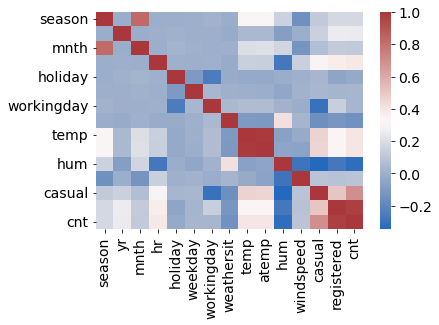

In [3]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

In [4]:
# Droping temp because it is perfectly correlated with atemp
df.drop('temp', axis=1, inplace=True)

## Scaling Data

In [5]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.2879,0.81,0.000000,0.008174,0.014673,0.015369
1,0.0,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.2727,0.80,0.000000,0.021798,0.036117,0.039959
2,0.0,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.2727,0.80,0.000000,0.013624,0.030474,0.031762
3,0.0,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.2879,0.75,0.000000,0.008174,0.011287,0.012295
4,0.0,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.2879,0.75,0.000000,0.000000,0.001129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.2576,0.60,0.193018,0.029973,0.121896,0.120902
17375,0.0,1.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.2576,0.60,0.193018,0.021798,0.091422,0.090164
17376,0.0,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.2576,0.60,0.193018,0.019074,0.093679,0.091189
17377,0.0,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.2727,0.56,0.157870,0.035422,0.054176,0.061475


## Breaking Data in X and y

In [6]:
# Drops the Casual and Registered rental count columns along with total rented bikes since they are essentially the same metric
X = df.iloc[:, :-3]

In [7]:
# We are trying to predict total bikes rented, not just casual or registered users
y = df.iloc[:, -1]

# Generating Models

In [8]:
# Using AutoKeras output to help us tune our parameters
# Can adjust hyperpameters, activation functions, and layer stucture based on our findings

auto_tune = ak.StructuredDataRegressor(max_trials=10, 
                                       overwrite=True,
                                       loss='mean_squared_error',
                                       output_dim=1,
                                       project_name='auto_keras'
                                       )

X_train, X_test, y_train, y_test = train_test_split(X, y)

auto_tune.fit(X_train, y_train, validation_split = 0.15, epochs = 10)
y_hat = auto_tune.predict(X_test)
print(auto_tune.evaluate(X_test, y_test))

auto_tune_mod = auto_tune.export_model()
print(auto_tune_mod.summary())


Trial 10 Complete [00h 00m 12s]
val_loss: 0.028867557644844055

Best val_loss So Far: 0.013198809698224068
Total elapsed time: 00h 02m 03s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 2/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 3/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 4/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 5/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 6/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 7/10
408/408 [==============================] - 1s 2ms/step - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 8/10
408/408 [==============================] -

In [9]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 50

# Defining batch size
bs = 32

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [10]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [11]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 934us/step - loss: 0.0555
Epoch 2/50
435/435 [==============================] - 0s 784us/step - loss: 0.0331
Epoch 3/50
435/435 [==============================] - 0s 836us/step - loss: 0.0299
Epoch 4/50
435/435 [==============================] - 0s 797us/step - loss: 0.0269
Epoch 5/50
435/435 [==============================] - 0s 793us/step - loss: 0.0247
Epoch 6/50
435/435 [===================

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1004.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


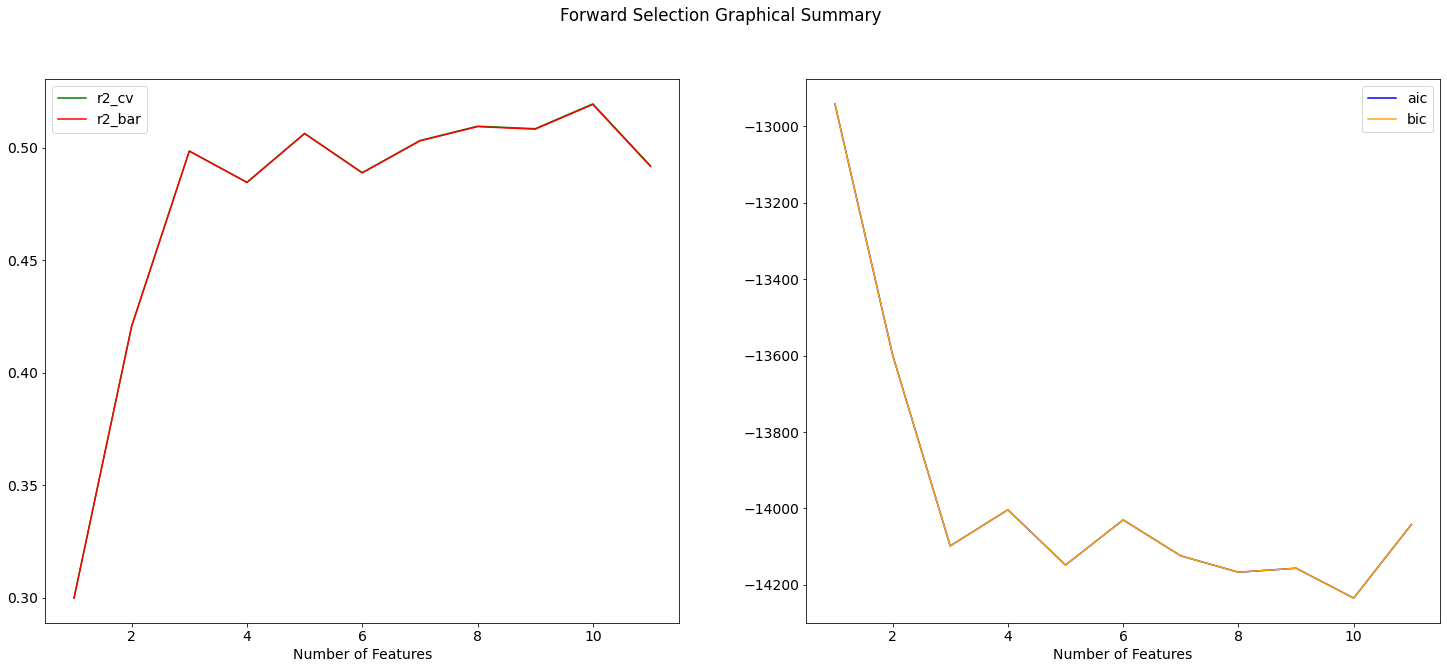

In [12]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [13]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [14]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 11)                132       
                                                                 
 dense_126 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0400
Epoch 2/50
435/435 [==============================] - 0s 948us/step - loss: 0.0232
Epoch 3/50
435/435 [==============================] - 0s 818us/step - loss: 0.0219
Epoch 4/50
435/435 [==============================] - 0s 908us/step - loss: 0.0214
Epoch 5/50
435/435 [==============================] - 0s 908us/step - loss: 0.0210
Epoch 6/50
435/435 [==================

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 11)                132       
                                                                 
 dense_136 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1004.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                       

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


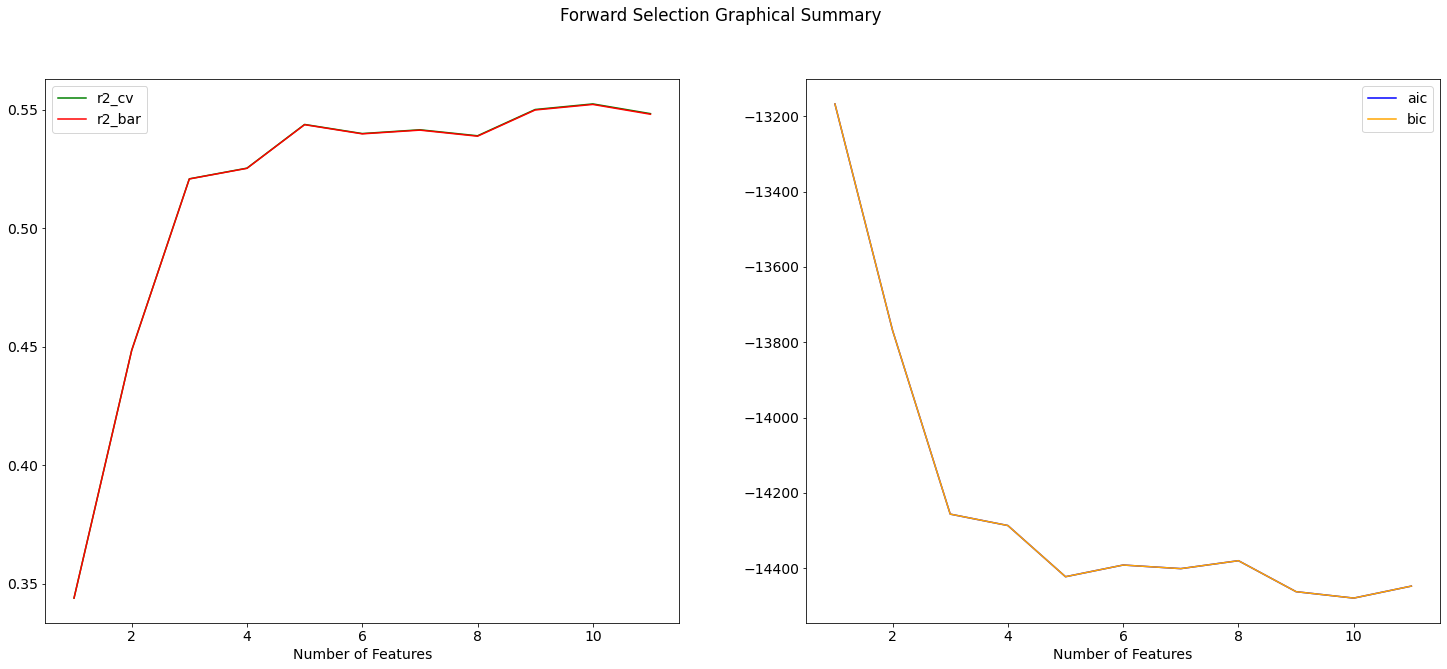

In [15]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [16]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'relu'

In [17]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_247 (Dense)           (None, 11)                132       
                                                                 
 dense_248 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0279
Epoch 2/50
435/435 [==============================] - 0s 945us/step - loss: 0.0209
Epoch 3/50
435/435 [==============================] - 0s 956us/step - loss: 0.0199
Epoch 4/50
435/435 [==============================] - 0s 984us/step - loss: 0.0193
Epoch 5/50
435/435 [==============================] - 0s 973us/step - loss: 0.0189
Epoch 6/50
435/435 [=================

Model: "sequential_127"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 11)                132       
                                                                 
 dense_258 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1004.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                      

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


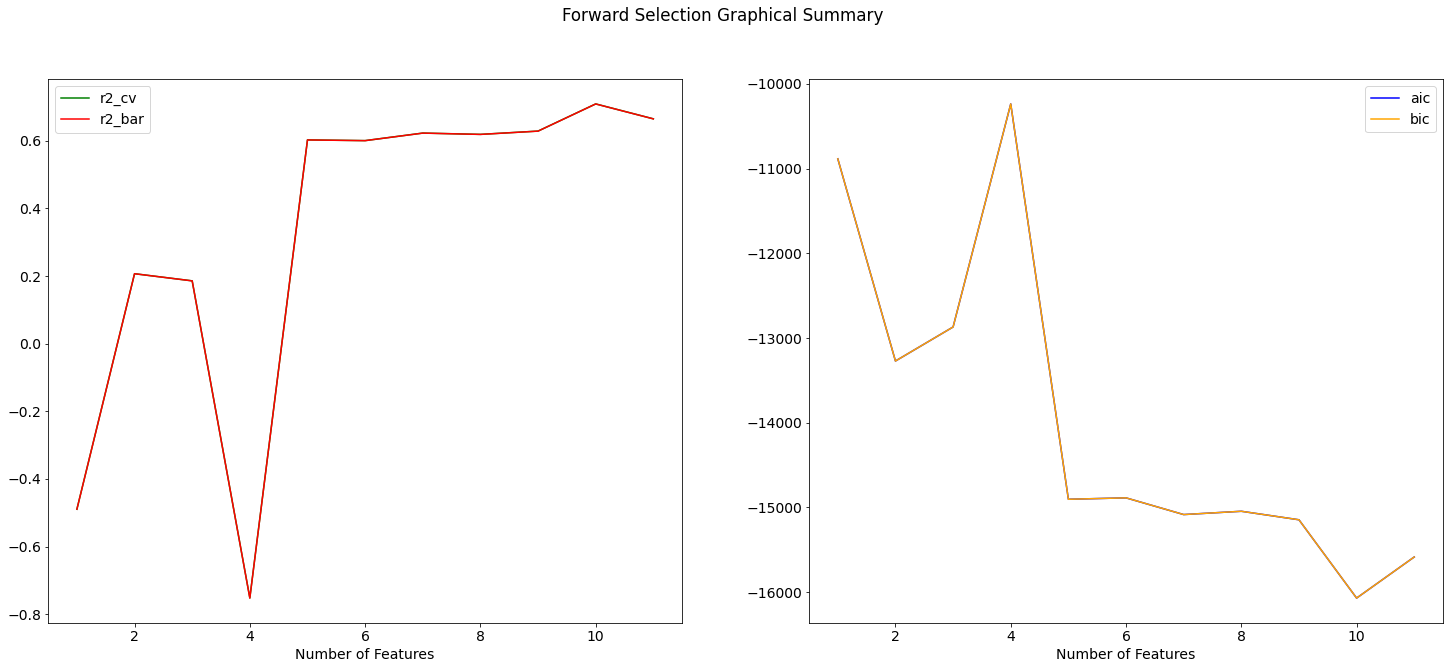

In [18]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [19]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [20]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 11)                132       
                                                                 
 dense_370 (Dense)           (None, 23)                276       
                                                                 
 dense_371 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0989
Epoch 2/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0347
Epoch 3/50
435/435 [==============================] - 1s 3ms/step - loss: 0.0335
Epoch 4/50
435/435 [==============================] - 1s 1ms/step - loss: 0

Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 11)                132       
                                                                 
 dense_385 (Dense)           (None, 23)                276       
                                                                 
 dense_386 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


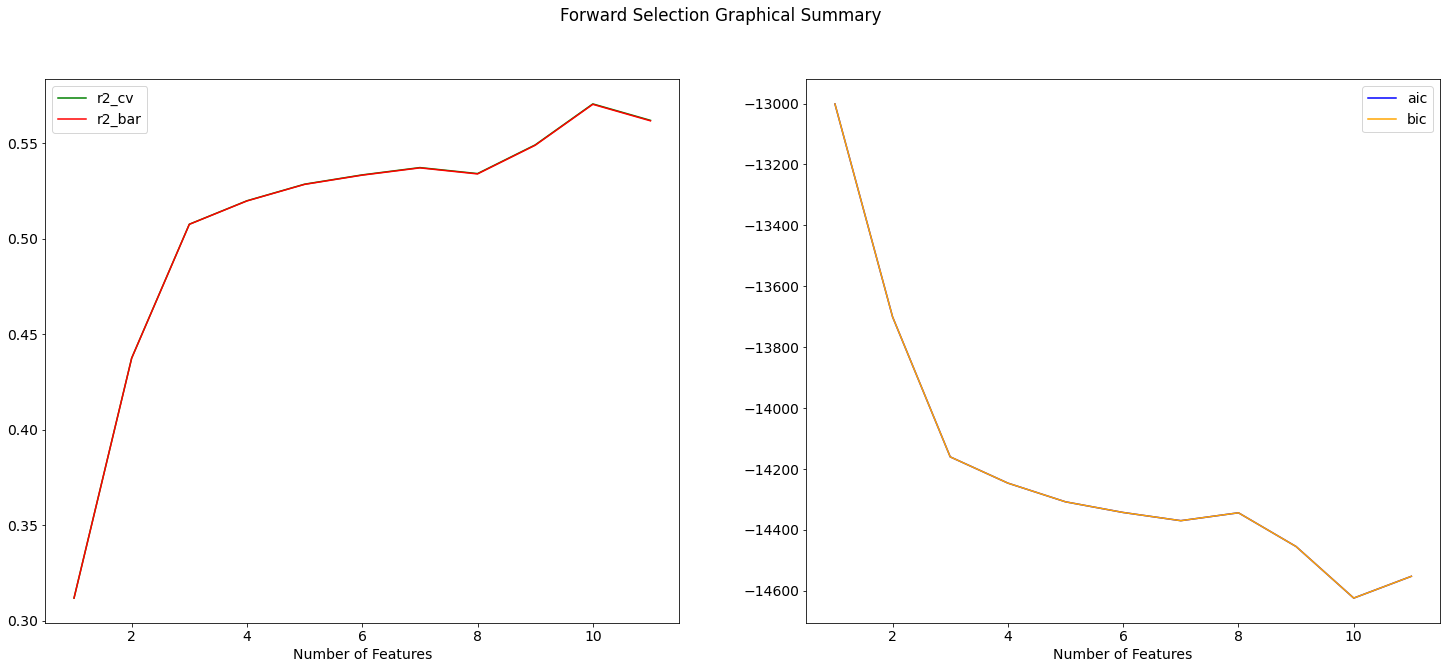

In [21]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [22]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [23]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_244"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_552 (Dense)           (None, 11)                132       
                                                                 
 dense_553 (Dense)           (None, 23)                276       
                                                                 
 dense_554 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0272
Epoch 2/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0214
Epoch 3/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0208
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 0

Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_567 (Dense)           (None, 11)                132       
                                                                 
 dense_568 (Dense)           (None, 23)                276       
                                                                 
 dense_569 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


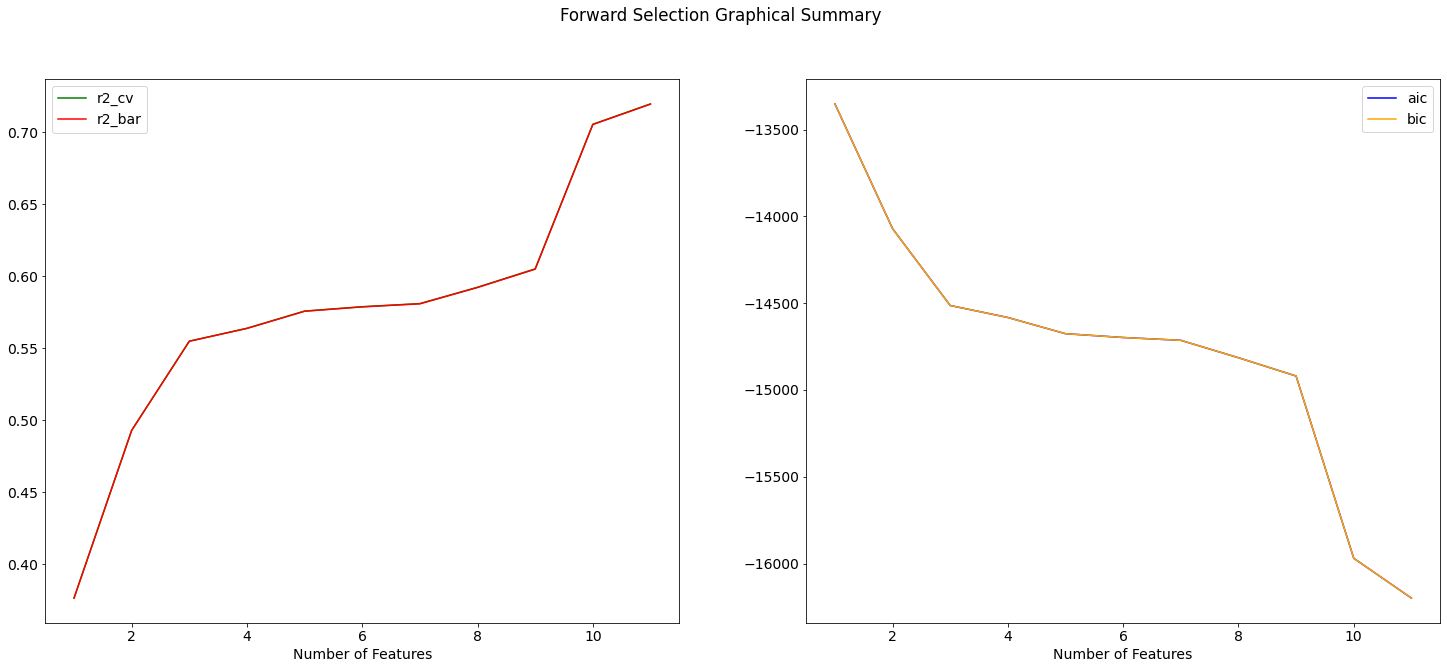

In [24]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [25]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'relu'

In [26]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_735 (Dense)           (None, 11)                132       
                                                                 
 dense_736 (Dense)           (None, 23)                276       
                                                                 
 dense_737 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0715
Epoch 2/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0715
Epoch 3/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0715
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 0

Model: "sequential_310"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_750 (Dense)           (None, 11)                132       
                                                                 
 dense_751 (Dense)           (None, 23)                276       
                                                                 
 dense_752 (Dense)           (None, 1)                 24        
                                                                 
Total params: 432
Trainable params: 432
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


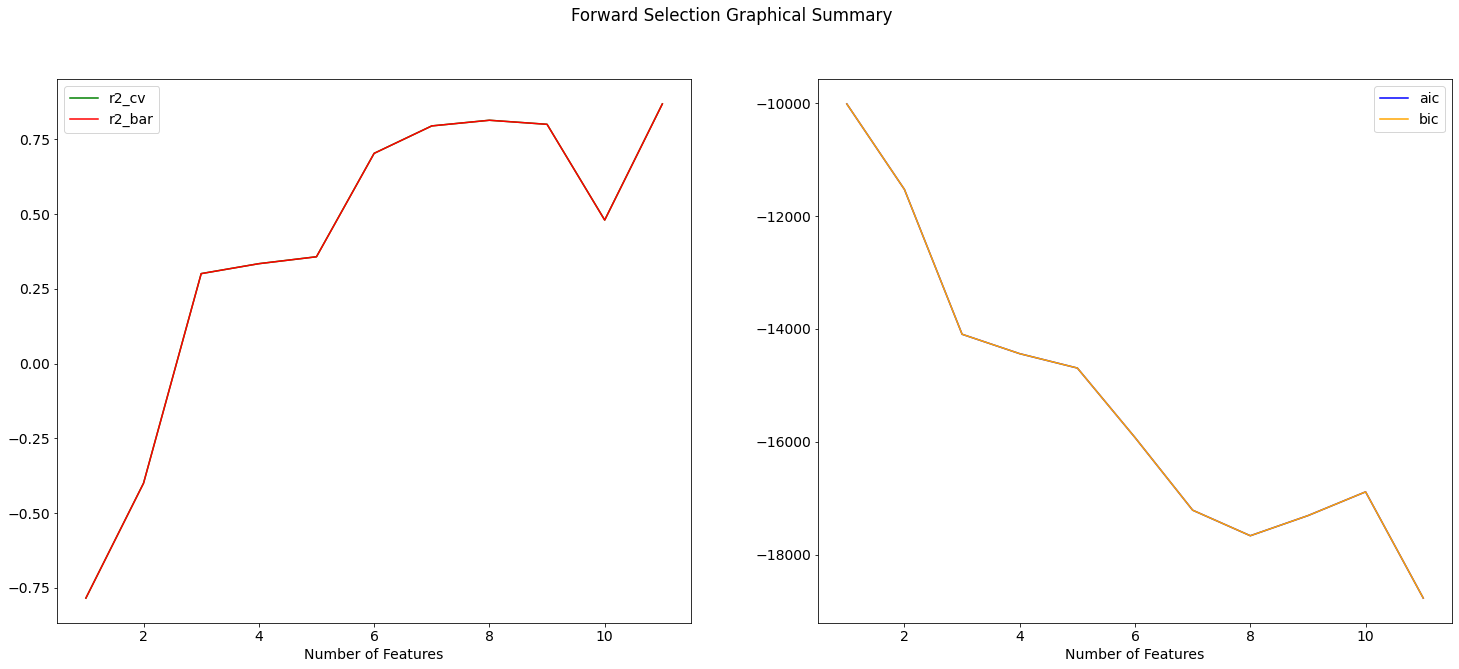

In [27]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 4 Layer Neural Networks

### Sigmoid Activation Function

In [28]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [29]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_366"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_918 (Dense)           (None, 11)                132       
                                                                 
 dense_919 (Dense)           (None, 23)                276       
                                                                 
 dense_920 (Dense)           (None, 12)                288       
                                                                 
 dense_921 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0363
Epoch 2/50
435/435 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 3/50
435/435 [====

Model: "sequential_371"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_938 (Dense)           (None, 11)                132       
                                                                 
 dense_939 (Dense)           (None, 23)                276       
                                                                 
 dense_940 (Dense)           (None, 12)                288       
                                                                 
 dense_941 (Dense)           (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


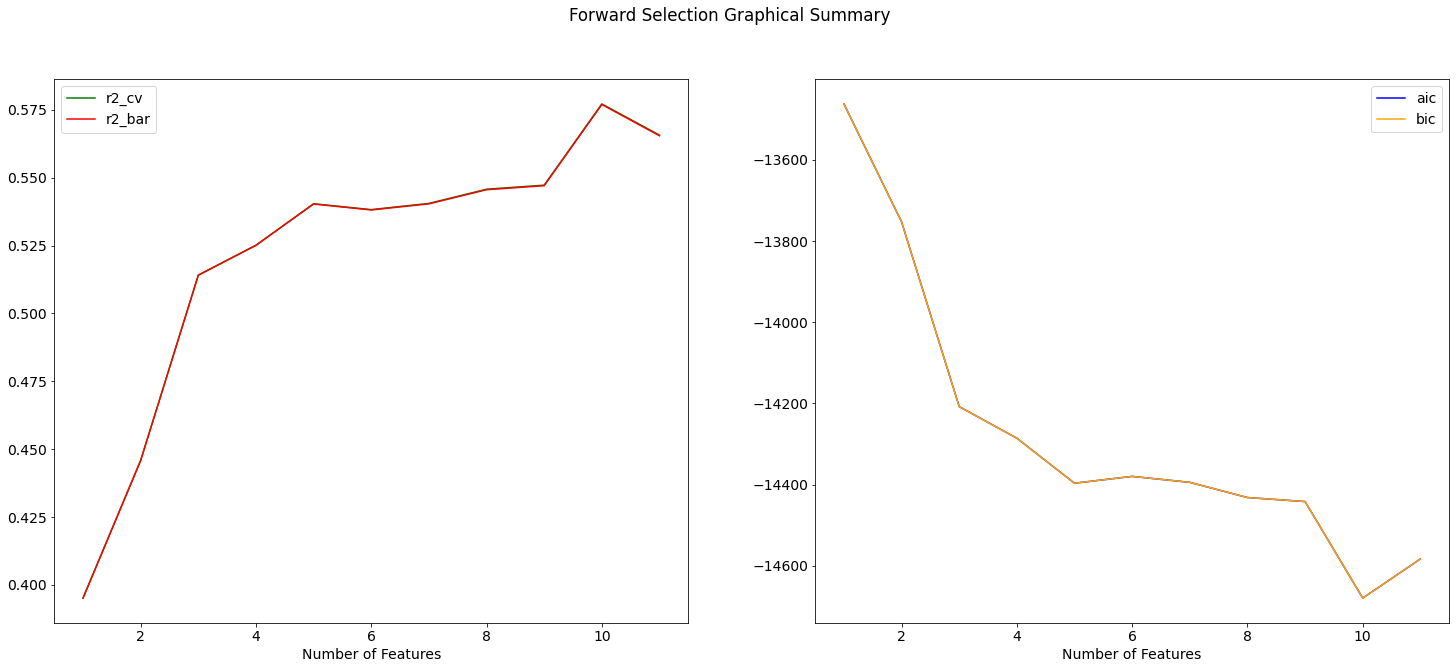

In [30]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [31]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [32]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_427"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1162 (Dense)          (None, 11)                132       
                                                                 
 dense_1163 (Dense)          (None, 23)                276       
                                                                 
 dense_1164 (Dense)          (None, 12)                288       
                                                                 
 dense_1165 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0382
Epoch 2/50
435/435 [==============================] - 0s 998us/step - loss: 0.0205
Epoch 3/50
435/435 [==

Model: "sequential_432"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1182 (Dense)          (None, 11)                132       
                                                                 
 dense_1183 (Dense)          (None, 23)                276       
                                                                 
 dense_1184 (Dense)          (None, 12)                288       
                                                                 
 dense_1185 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


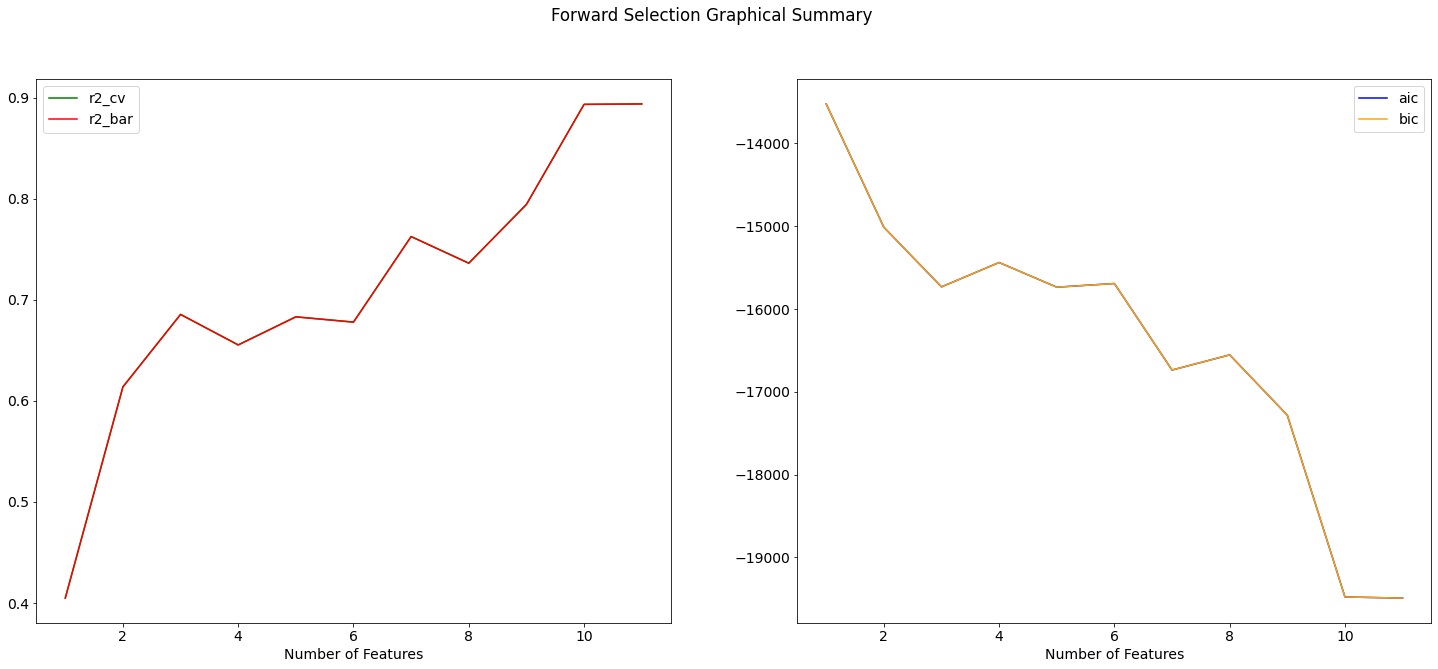

In [33]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [34]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'relu'

In [35]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_488"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1406 (Dense)          (None, 11)                132       
                                                                 
 dense_1407 (Dense)          (None, 23)                276       
                                                                 
 dense_1408 (Dense)          (None, 12)                288       
                                                                 
 dense_1409 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0223
Epoch 2/50
435/435 [==============================] - 1s 1ms/step - loss: 0.0165
Epoch 3/50
435/435 [====

Model: "sequential_493"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1426 (Dense)          (None, 11)                132       
                                                                 
 dense_1427 (Dense)          (None, 23)                276       
                                                                 
 dense_1428 (Dense)          (None, 12)                288       
                                                                 
 dense_1429 (Dense)          (None, 1)                 13        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


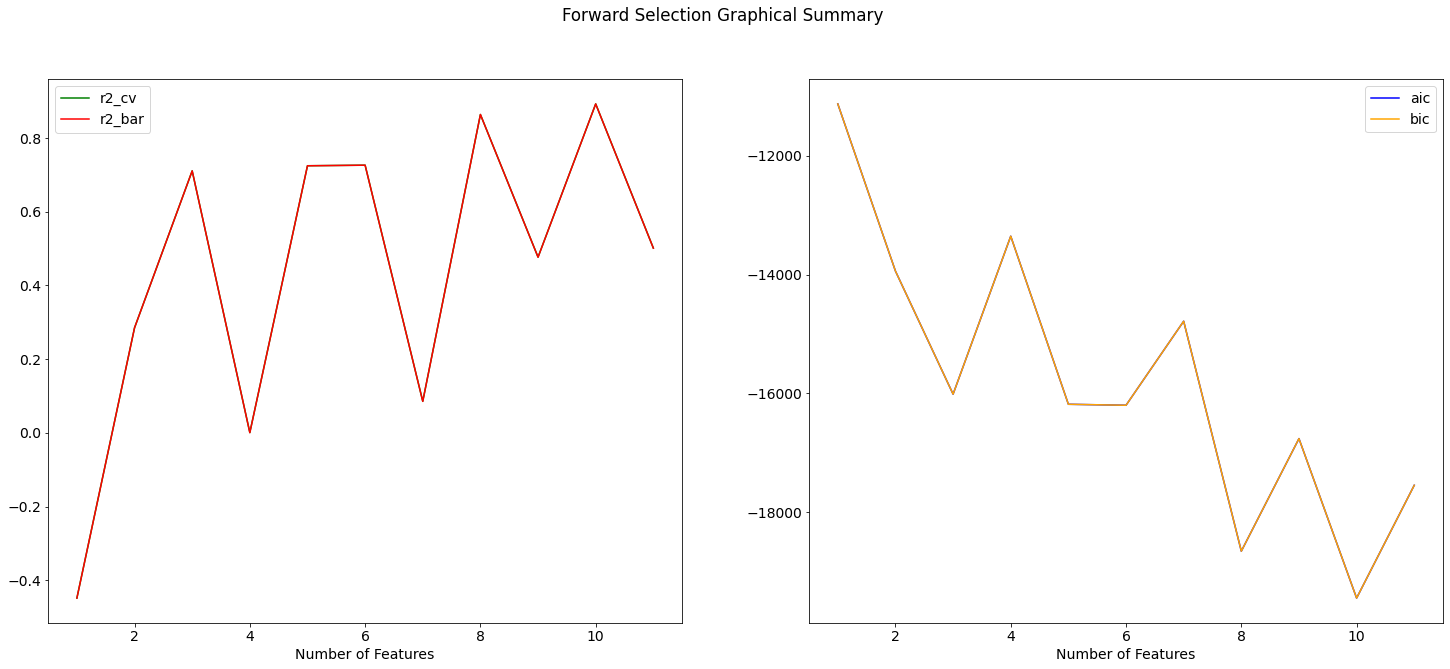

In [36]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)